# Capestone Project 数据集探索
## / Toxic Toxic Comment Classification /

- - -
<ul>
<li><a href="#prepare">I 环境准备</a></li>
<li><a href="#wrangling">II 数据整理</a></li>
<li><a href="#eda">III 探索性数据分析</a></li>
<li><a href="#conclusions">IV 结论</a></li>
</ul>

<a id='intro'></a>

<center><a id='prepare'>I 环境准备</a></center>

In [84]:
# prpare env 

# 用这个框对你计划使用的所有数据包进行设置
# 导入语句
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置参数显示长文本
pd.options.display.max_colwidth = 500

%matplotlib inline

In [85]:
# import files
test = pd.read_csv('test.csv')
## found utf8 content
## -1 是可能的选择，0为非攻击性语言

test_labels = pd.read_csv('test_labels.csv')

train = pd.read_csv('train.csv')
## 1 是标记为恶毒的分类

In [5]:
test.head(6)
## 注意第6行是良好评论数据

,id,comment_text
0,00001cee341fdb12,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very highly of you and would not revert without discussion.


In [17]:
test_labels.head(6)
## 注意在test_labels中，提示了良好评论的分类（全为0）

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0


In [9]:
train.head(7)
## 注意第7行是train的目标数据处理结果
## 将涉及到的负面类型通过1来标记

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess t...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the tools well. · talk """,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0


<center><a id='wrangling'>II 数据整理</a></center>

**<center>---check files---</center>**

In [10]:
# file - train
## describe check
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
## shape / columns check
train.shape, train.columns

((159571, 8),
 Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
        'insult', 'identity_hate'],
       dtype='object'))

In [11]:
## null check
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [29]:
## duplicated check
train.duplicated().sum()

0

In [30]:
# file - test
## describe
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,8db58cdfce623d26,Sometimes tilt can be quite large angles (30 degrees) eg http://www.zoerk.com/pages/p_mfs.htm \n This is only a tilt lens but they suggest combining it with their shift adapter to make a tilt-shift system.
freq,1,1


In [86]:
## shape / columns check
test.shape, test.columns

((153164, 2), Index(['id', 'comment_text'], dtype='object'))

In [32]:
## null check
test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [33]:
## duplicated check
test.duplicated().sum()

0

In [34]:
# file - test_lable
## describe
test_labels.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000
mean,-0.542530,-0.579895,-0.558193,-0.580913,-0.559916,-0.577642
std,0.572465,0.498408,0.542966,0.496195,0.539594,0.503260
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
## shape / columns check
test_labels.shape, test_labels.columns

((153164, 7),
 Index(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
        'identity_hate'],
       dtype='object'))

In [35]:
## null check
test_labels.isnull().sum()

id               0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [36]:
## duplicated check
test_labels.duplicated().sum()

0

**<center>---train data distribution---</center>**

In [63]:
# 制作 labels （后续优化，直接iloc跳行选中）
train_labels = train.drop(columns = 'comment_text')
print(train_labels.shape)
train_labels.head(7)

(159571, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,0,0,0,0,0,0
1,000103f0d9cfb60f,0,0,0,0,0,0
2,000113f07ec002fd,0,0,0,0,0,0
3,0001b41b1c6bb37e,0,0,0,0,0,0
4,0001d958c54c6e35,0,0,0,0,0,0
5,00025465d4725e87,0,0,0,0,0,0
6,0002bcb3da6cb337,1,1,1,0,1,0


In [56]:
# value counts
## value_counts 适用于 series (一维的计算)
## 可以使用 apply 运用于每列
value_counts = train_labels.apply(pd.value_counts)
value_counts.iloc[-1:,1:]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
1,15294.0,1595.0,8449.0,478.0,7877.0,1405.0


In [59]:
# 计算出ratio
train_labels_ratio = train_labels.apply(pd.value_counts) \
.iloc[-1:,1:]/train_labels.shape[0]
train_labels_ratio

,toxic,severe_toxic,obscene,threat,insult,identity_hate
1,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805


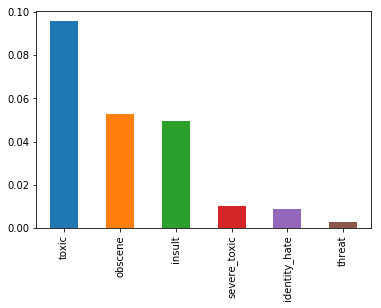

In [60]:
# 使用.T转置数据，直接根据ratio画图
train_labels_ratio.iloc[0].sort_values(ascending = False).T \
.plot(kind='bar', legend=False, grid=False);
## iloc[0].sort_values 是按照第0行进行排序
## 因为只按照一行画图，T转置一下

In [83]:
# 计算恶毒评论比率
round(train_labels.query('severe_toxic==1 or toxic==1 or obscene==1 or threat==1 or insult==1 or identity_hate==1')
      .shape[0]/train_labels.shape[0], 4)

0.1017

In [126]:
# 热力图
## 因为有一个评论归属为多个类型的情况（多选题）
## 只能用于展示包括2个组合的比率出现的频率关系
## 需要循环进行处理，比较复杂，先搁置

**<center>---test data distribution---</center>**

In [62]:
# 检查shape
print(test_labels.shape)
test_labels.head(3)
# test label 需要处理分类之后才能比较

(153164, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1


In [72]:
# 可以使用 .add 串接加和（太丑）
test_labels['toxic'].add(test_labels['severe_toxic']).add(test_labels['obscene'])[:3]
# 因为数据的特点，可以只判断随便一列是否为0
test_labels.query('toxic == 0').shape[0]

57888

In [73]:
# 不偷懒的话可以使用多个query （举两个列的例子）
test_labels.query('toxic == 0 and severe_toxic == 0').shape[0]

57888

In [74]:
# 或者这样
test_labels.query('toxic == 0').query('severe_toxic == 0').shape[0]

57888

In [76]:
# 计算恶毒评论几率
round(test_labels.query('toxic == 0').shape[0] / test_labels.shape[0], 4)

0.3779

<center><a id='eda'>III 探索性数据分析</a></center>

<center><a id='conclusions'>IV 结论</a></center>